In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import datetime as dt
from dateutil.parser import parse


In [3]:
df = pd.read_csv('samford_chiller/dss_Samford_chillers.csv')

In [4]:
df.head()

,timestamp,CH_kW/Ton,CH_kWh,CH_TON,CH1_CDW_DT,CH1_CHLRcmd_Alarm,CH1_CHW_DT,CH1_CHWSTSP_Alarm,CH1_CompSH,CH1_CondApproach,...,COMLOSSBAS,commfail,CommFail_Alarm,OAH,OAT,OAWB,RUNCHLR1,RUNCHLR2,RUNCHLR3,RUNCHLR4
0,2018-01-01T00:00:00.000Z,0.182509,64.0,375.539581,4.5,0.0,-2.500000,0.0,2.099998,-2.000000,...,0.0,0.0,0.0,42.557945,21.783529,17.638870,0.0,1.0,0.0,0.0
1,2018-01-01T00:05:00.000Z,0.181050,65.0,382.522461,4.5,0.0,-2.599998,0.0,2.000000,-2.000000,...,0.0,0.0,0.0,42.628120,21.783529,17.645111,0.0,1.0,0.0,0.0
2,2018-01-01T00:10:00.000Z,0.180988,68.0,410.909302,4.5,0.0,-2.599998,0.0,2.000000,-2.000000,...,0.0,0.0,0.0,41.931522,21.783529,17.598881,0.0,1.0,0.0,0.0
3,2018-01-01T00:15:00.000Z,0.170085,69.0,412.407104,4.5,0.0,-2.599998,0.0,1.899998,-2.000000,...,0.0,0.0,0.0,42.241447,21.456541,17.338827,0.0,1.0,0.0,0.0
4,2018-01-01T00:20:00.000Z,0.177480,72.0,422.961029,4.5,0.0,-2.500000,0.0,2.000000,-1.899998,...,0.0,0.0,0.0,42.327991,21.456541,17.344910,0.0,1.0,0.0,0.0


In [102]:
df.columns[4:53]

Index(['CH1_CDW_DT', 'CH1_CHLRcmd_Alarm', 'CH1_CHW_DT', 'CH1_CHWSTSP_Alarm',
       'CH1_CompSH', 'CH1_CondApproach', 'CH1_DP_Lift', 'CH1_DT_Lift',
       'CH1_EvapApproach', 'CH1_kW/Ton', 'CH1ALARM', 'CH1AVAIL', 'CH1CDP',
       'CH1CDT', 'CH1CDWRT', 'CH1CDWST', 'CH1CDWVLV', 'CH1CHWDP', 'CH1CHWFLO',
       'CH1CHWFLO_Meter', 'CH1CHWRT', 'CH1CHWST', 'CH1CHWSTSP', 'CH1CHWVLV',
       'CH1COMDISCHT', 'CH1CondApproach', 'CH1CYCLF', 'CH1DMD', 'CH1DPLift',
       'CH1DTLift', 'CH1EvapApproach', 'CH1EVP', 'CH1EVT', 'CH1F', 'CH1FLA',
       'CH1Hz', 'CH1IGV', 'CH1kW', 'CH1Lift', 'CH1Load', 'CH1REFLVL', 'CH1S',
       'CH1SBoolean', 'CH1SPD', 'CH1SS', 'CH1STATE', 'CH1SURGECNT', 'CH1Ton',
       'CH1WARNF'],
      dtype='object')

In [5]:
def get_datetime(y):
    x = parse(y)
    return x

In [6]:
df['datetime'] = df['timestamp'].apply(get_datetime)

In [7]:
CH_features = ['_kW/Ton','Load','CDWRT','CDWST','DTLift','Ton','_EvapApproach',
               '_CondApproach','Hz','_CompSH','IGV','REFLVL']

In [8]:
def chiller_data(df, CH, CH_features):
    df_chiller = pd.DataFrame()
    df_chiller['datetime'] = df['timestamp'].apply(get_datetime)
    
    for f in CH_features:
        if f[0] == '_':
            ff = f[1:]
        else:
            ff = f
        feature = 'CH'+CH+f
        df_chiller[ff] = df[feature]
        
    return df_chiller

In [9]:
chillers = ['1','2','3','4']

df_chiller = chiller_data(df,'1',CH_features)
for c in chillers:
    df_chiller = chiller_data(df,c,CH_features)
    df_chiller.to_csv('data/S'+c+'_chiller.csv')

In [109]:
df_chiller.head()

,datetime,kW/Ton,Load,CDWRT,CDWST,DTLift,Ton,EvapApproach,CondApproach,Hz,CompSH,IGV,REFLVL
0,2018-01-01 00:00:00+00:00,0.0,0.0,55.900002,51.400002,2.000000,0.0,1.000000,-2.000000,0.0,2.099998,0.0,2.1
1,2018-01-01 00:05:00+00:00,0.0,0.0,55.900002,51.400002,1.900002,0.0,1.099998,-2.000000,0.0,2.000000,0.0,2.1
2,2018-01-01 00:10:00+00:00,0.0,0.0,55.900002,51.400002,1.900002,0.0,1.099998,-2.000000,0.0,2.000000,0.0,2.1
3,2018-01-01 00:15:00+00:00,0.0,0.0,55.900002,51.400002,1.900002,0.0,1.099998,-2.000000,0.0,1.899998,0.0,2.1
4,2018-01-01 00:20:00+00:00,0.0,0.0,55.799999,51.299999,1.899998,0.0,1.000000,-1.899998,0.0,2.000000,0.0,2.0


## Plot chiller data

In [12]:
Chiller1 = chiller_data(df,'1',CH_features)
Chiller1.columns

Index(['datetime', 'kW/Ton', 'Load', 'CDWRT', 'CDWST', 'DTLift', 'Ton',
       'EvapApproach', 'CondApproach', 'Hz', 'CompSH', 'IGV', 'REFLVL'],
      dtype='object')

In [15]:
Chiller1.drop(Chiller1[Chiller1['Load'] == 0].index, inplace=True)
Chiller1.drop(Chiller1[Chiller1['kW/Ton'] == 0].index, inplace=True)


In [20]:
col_list = { 10:'blue',
             20:'red',
             30:'green',
             40:'yellow',
             50:'purple'}


def pltcolor(lift,col_list):
    cols=[]
    for l in lift:
        if l <= 15:
            cols.append(col_list[10])
        elif (l > 15) and (l <= 25):
            cols.append(col_list[20])
        elif (l > 25) and (l <= 35):
            cols.append(col_list[30])
        elif (l > 35) and (l <= 45):
            cols.append(col_list[40])
        elif (l > 45):
            cols.append(col_list[50])
    return cols

bands = pltcolor(list(Chiller1['DTLift']),col_list)

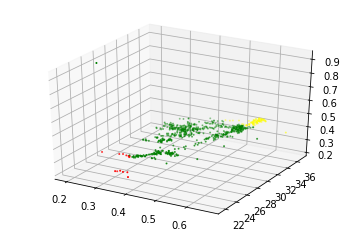

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Chiller1['Load'], Chiller1['DTLift'],Chiller1['kW/Ton'], 
               zdir='z', s=1, depthshade=True, c=bands)